In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/gnaneshwari1802/EDA-Bank-Loan-Default-Risk-Analysis/main/Training%20Data.csv/Training%20Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [60]:
data['Risk_Flag'].unique()

array([0, 1], dtype=int64)

In [7]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [8]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


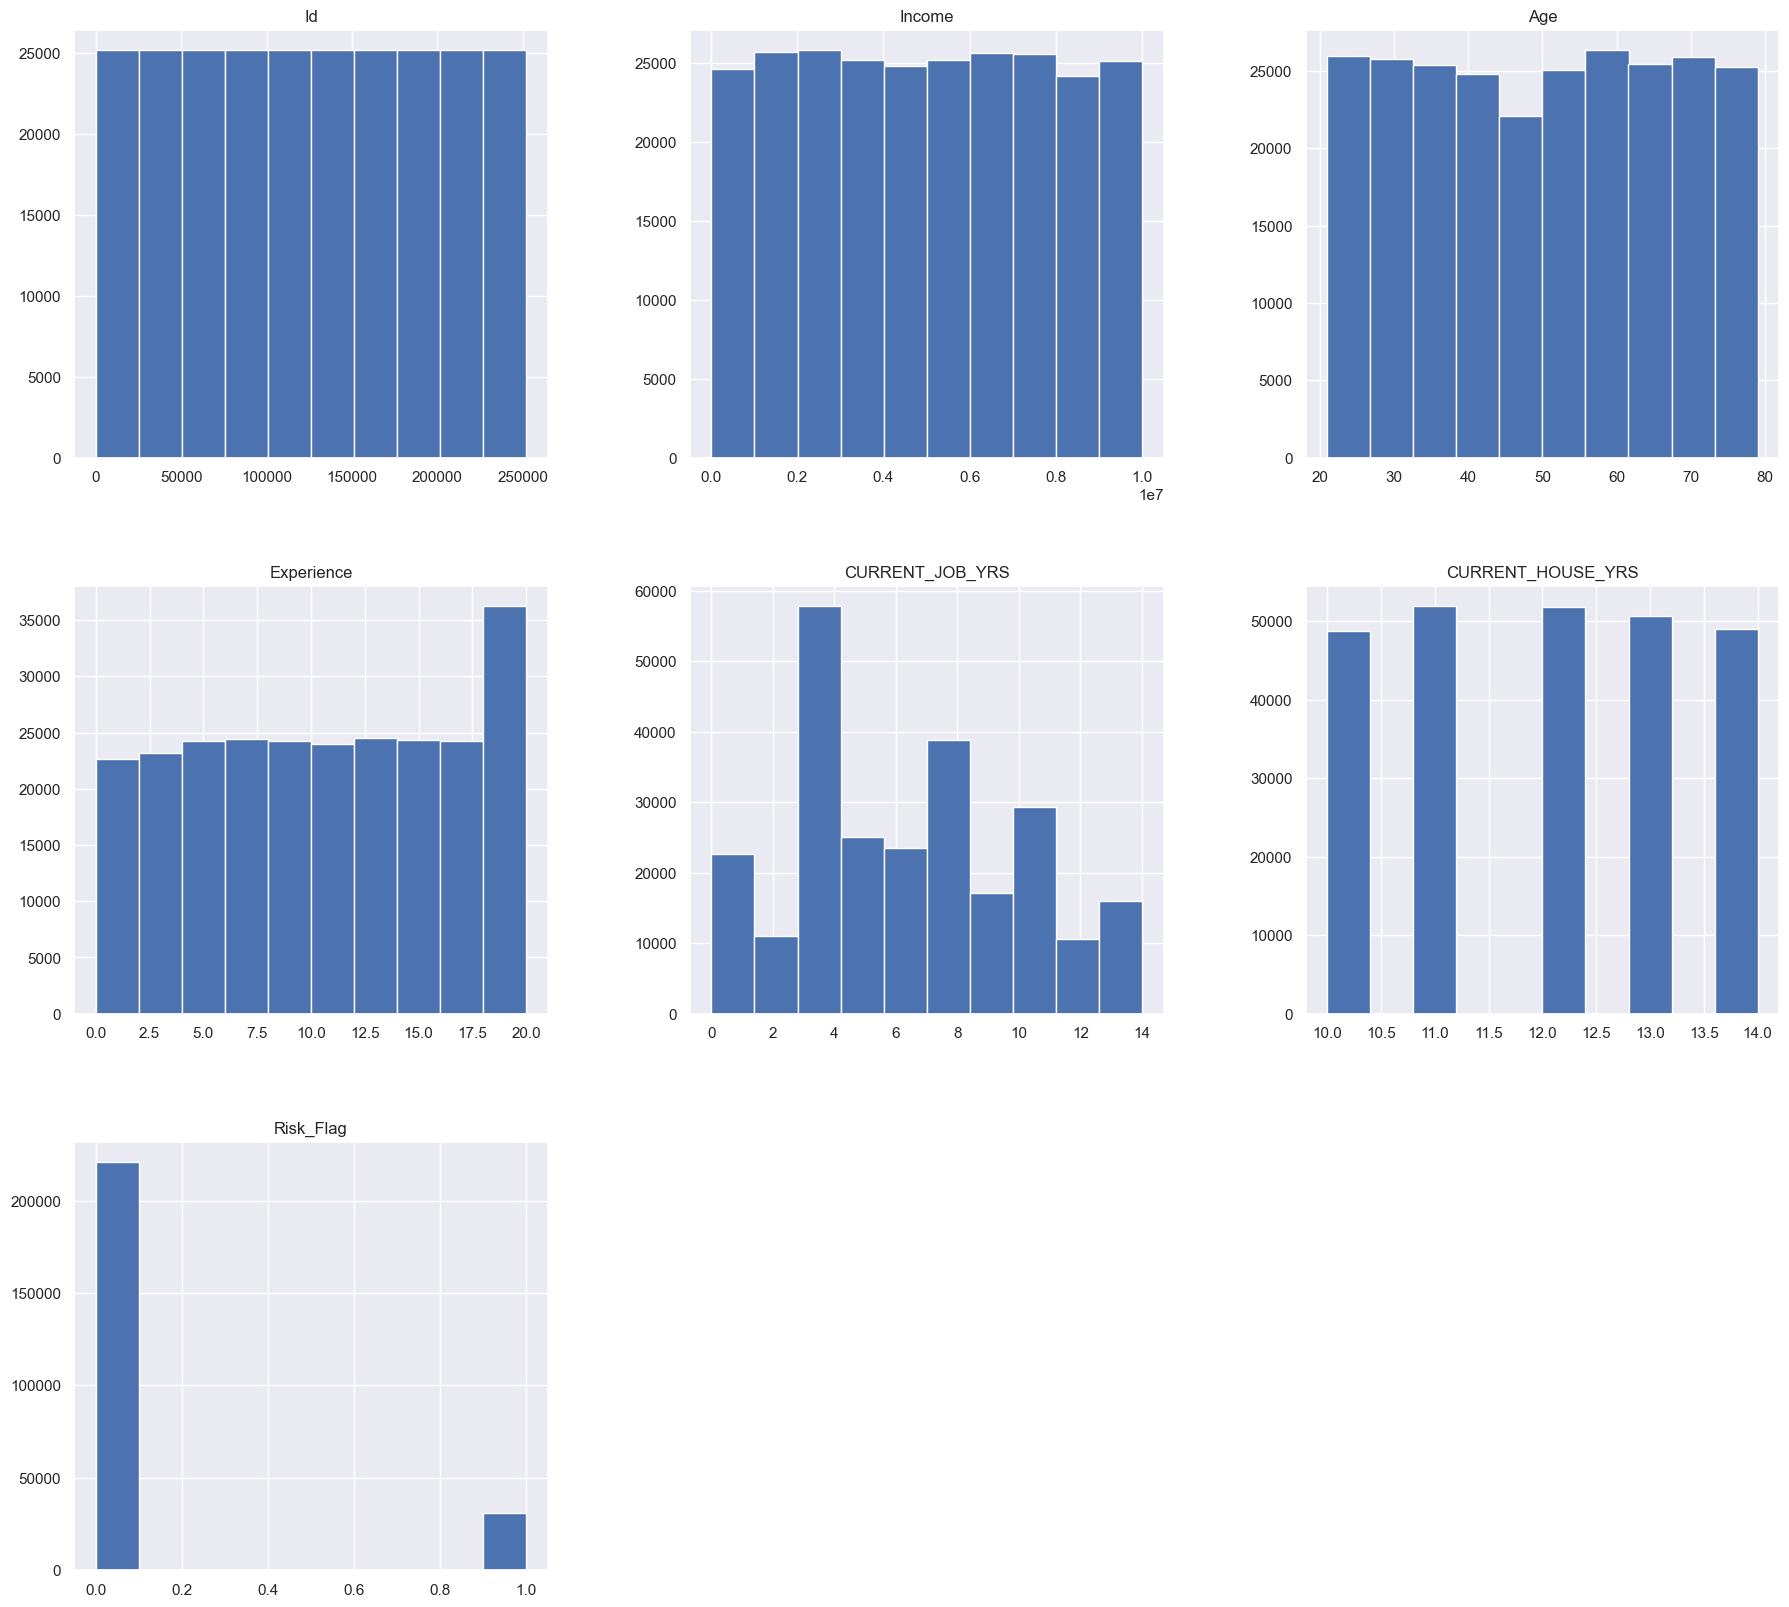

In [9]:
data.hist( figsize = (22, 20) )
plt.show()

In [10]:
data["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

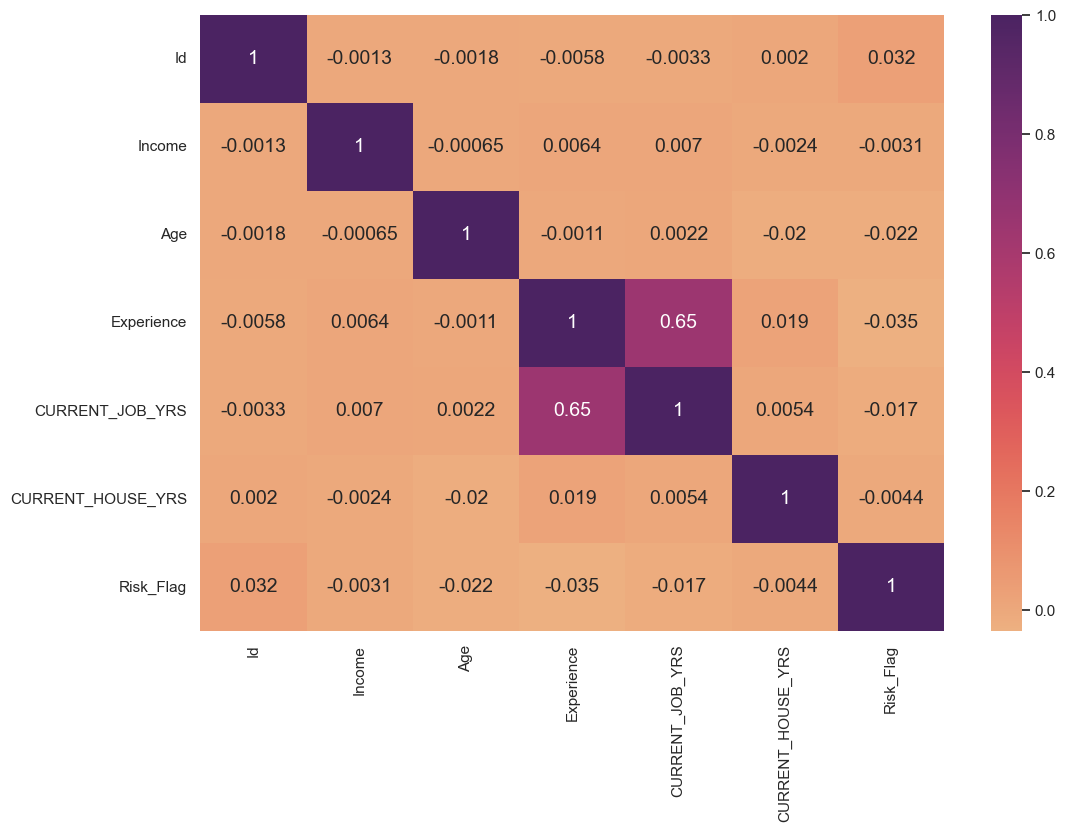

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(12, 8))
corr_heatmap = sns.heatmap(corr_matrix, cmap="flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()


In [12]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Married/Single
single     226272
married     25728
Name: count, dtype: int64


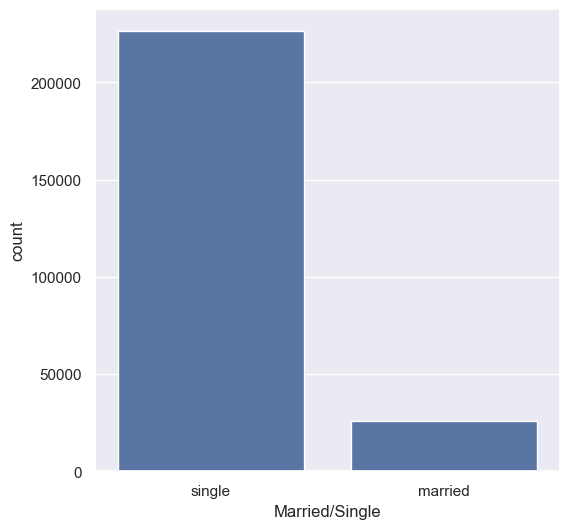

In [13]:
categorical_valcount_hist("Married/Single")

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


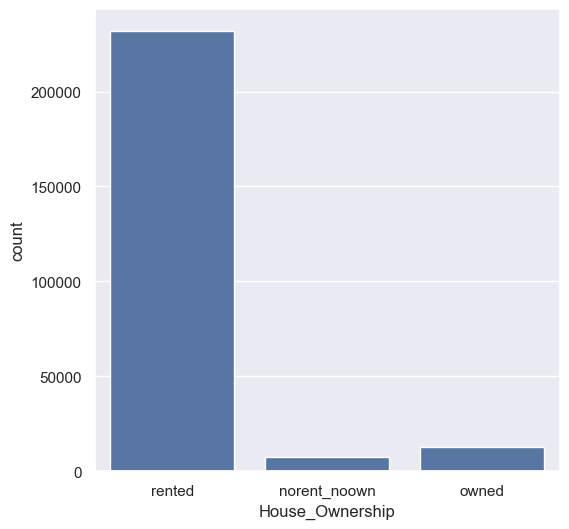

In [14]:
categorical_valcount_hist("House_Ownership")

In [15]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


In [16]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()


Total categories in Profession: 51



Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

<Axes: xlabel='Risk_Flag', ylabel='Income'>

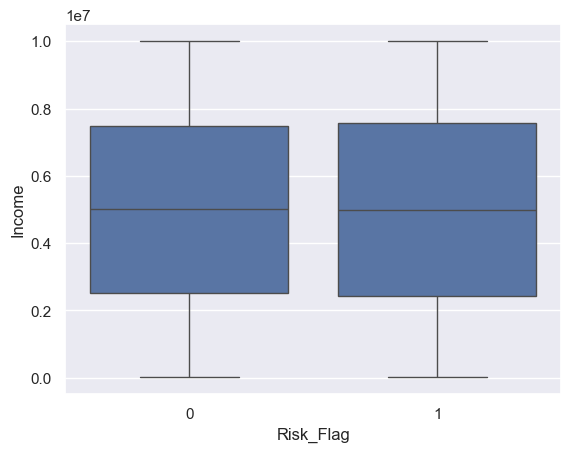

In [17]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Age'>

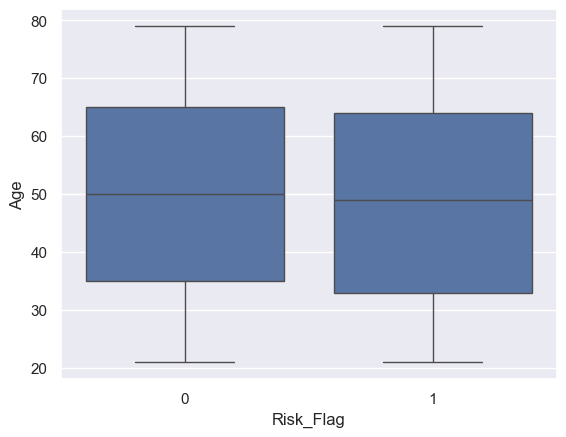

In [18]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Experience'>

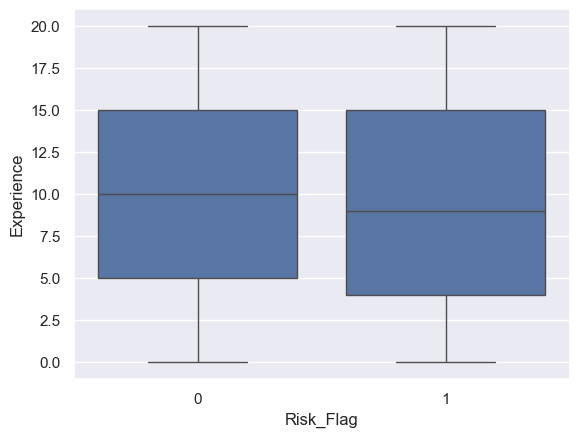

In [19]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

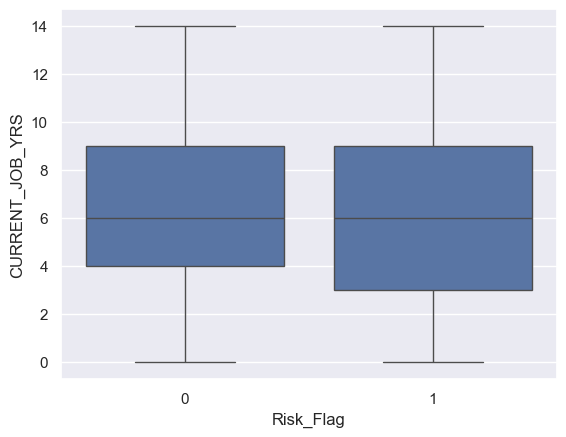

In [20]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

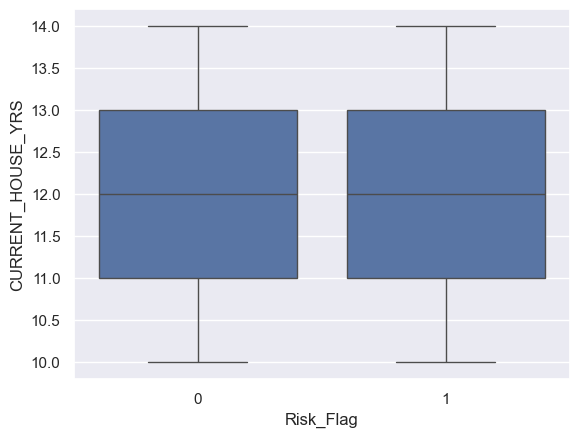

In [21]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<Axes: xlabel='Car_Ownership', ylabel='count'>

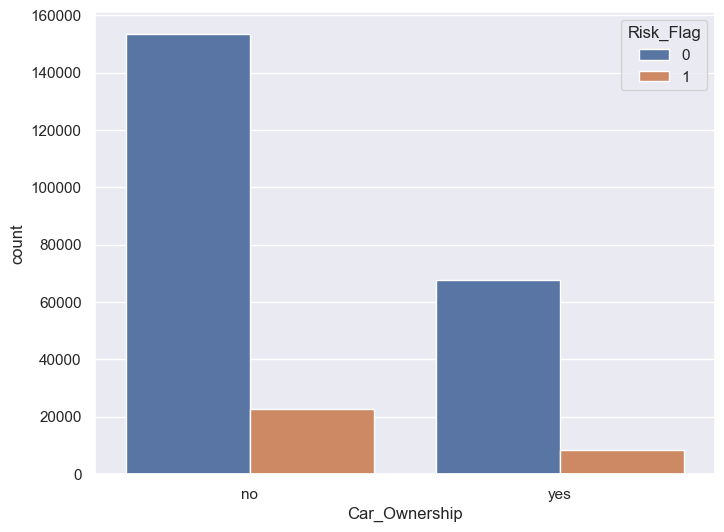

In [22]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

<Axes: xlabel='Married/Single', ylabel='count'>

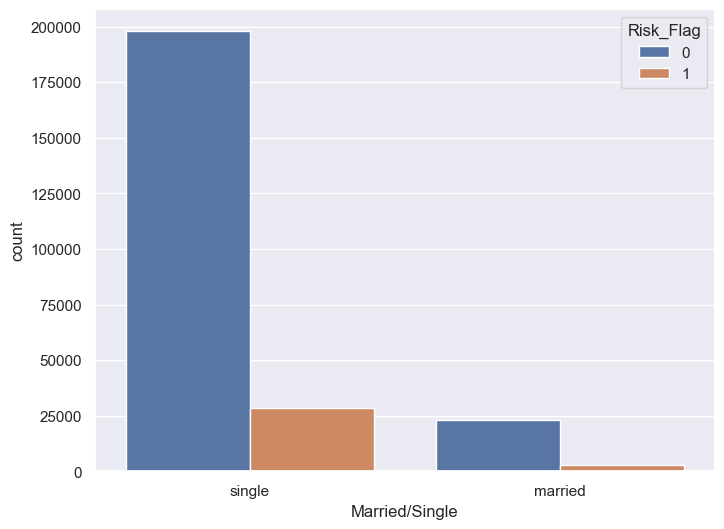

In [23]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

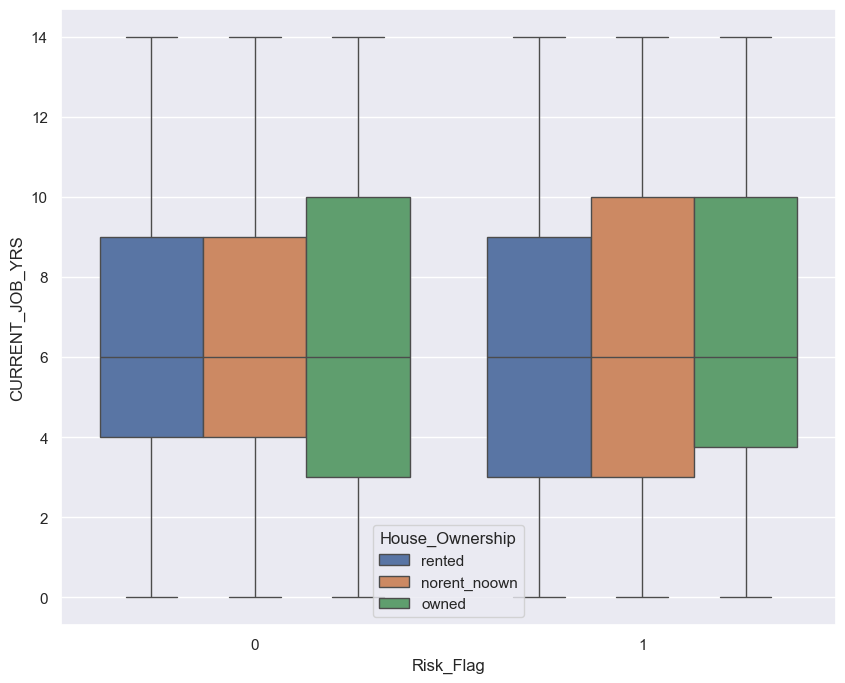

In [24]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

In [25]:
# pip install category_encoders


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce

label_encoder = LabelEncoder()
for col in ['Married/Single', 'Car_Ownership']:
    data[col] = label_encoder.fit_transform(data[col])

onehot_encoder = OneHotEncoder()
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1)).toarray()

high_card_features = ['Profession', 'CITY', 'STATE']
count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform(data[high_card_features])
data = data.join(count_encoded.add_suffix("_count"))

data = data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)


In [27]:
data['House_Ownership']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
251995    0.0
251996    0.0
251997    0.0
251998    0.0
251999    0.0
Name: House_Ownership, Length: 252000, dtype: float64

In [28]:
x = data.drop("Risk_Flag", axis=1)
y = data["Risk_Flag"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [29]:
# pip install imbalanced-learn


In [30]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=9)

pipeline = Pipeline(steps=[['smote', smote_sampler], ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)


In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [32]:

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254


In [33]:
from sklearn import tree

DT=tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)

In [34]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254


In [35]:
from sklearn.svm import SVC
svn = SVC()


svn.fit(x_train, y_train)

SVC()

In [36]:
y_pred = pipeline.predict(x_test)

In [37]:

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred = pipeline.predict(x_test)

In [40]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254


In [56]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [61]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,random_state=2)
km.fit(x)

KMeans(n_clusters=2, random_state=2)

In [62]:
x_train.size

2419200

In [63]:
num_samples = x_train.shape[0]
num_samples

201600

In [64]:
num_features = x_train.shape[1]
num_features

12

In [65]:
km

KMeans(n_clusters=2, random_state=2)

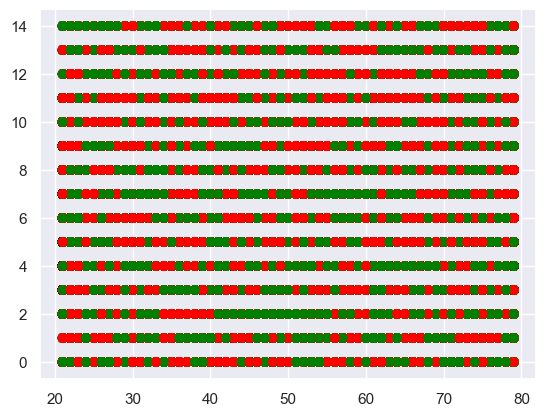

In [66]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(data['Age'], data['CURRENT_JOB_YRS'],c=colormap[km.labels_])

In [67]:
print("Size of data['Age']:", data['Age'].size)
print("Size of data['CURRENT_JOB_YRS']:", data['CURRENT_JOB_YRS'].size)
print("Size of km.labels_:", km.labels_.size)


Size of data['Age']: 252000
Size of data['CURRENT_JOB_YRS']: 252000
Size of km.labels_: 252000


In [76]:
np.unique(km.labels_)

array([0, 1])

In [77]:
km.labels_

array([1, 0, 1, ..., 1, 0, 0])

In [78]:
km.labels_.size

252000

In [79]:
data.size

3276000

In [80]:
# Check the sizes of data and km.labels_
print("Size of data['Married/Single']: ", data['Married/Single'].size)
print("Size of data['Car_Ownership']: ", data['Car_Ownership'].size)
print("Size of km.labels_: ", km.labels_.size)


Size of data['Married/Single']:  252000
Size of data['Car_Ownership']:  252000
Size of km.labels_:  252000


In [81]:
centers=km.cluster_centers_
print(centers)

[[1.25838719e+05 7.48741903e+06 4.98120531e+01 1.00823257e+01
  8.98322129e-01 2.45227293e-02 2.97733013e-01 6.33908196e+00
  1.19927944e+01 4.96600614e+03 8.20990300e+02 1.69327904e+04]
 [1.26163030e+05 2.49528485e+06 5.00967472e+01 1.00865570e+01
  8.97485462e-01 3.25115942e-02 3.05459434e-01 6.32864791e+00
  1.20028160e+01 4.97194918e+03 8.28295842e+02 1.68356944e+04]]


In [82]:
km.labels_

array([1, 0, 1, ..., 1, 0, 0])

In [83]:
Catagory_kmeans=["No","Yes"]
Catagory_kmeans

['No', 'Yes']

In [84]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [89]:
X_km=np.array([[23,	3,	1,	0.0,	0,	3,	13,	52,17,	798,	14,122]])
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Yes


C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [85]:
x

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,3,13,5217,798,14122
1,2,7574516,40,10,1,0.0,0,9,13,5053,849,25562
2,3,3991815,66,4,0,0.0,0,4,10,5195,688,5805
3,4,6256451,41,2,1,0.0,1,2,12,5053,607,4658
4,5,5768871,47,11,1,0.0,0,3,14,4413,809,16537
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,0.0,0,6,11,4772,1033,23483
251996,251997,2843572,26,10,1,0.0,0,6,11,4661,798,14122
251997,251998,4522448,46,7,1,0.0,0,7,12,4729,741,25562
251998,251999,6507128,45,0,1,0.0,0,0,10,5166,897,1433


In [86]:
x.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Profession_count', 'CITY_count', 'STATE_count'],
      dtype='object')

In [98]:
# print("-------------------------TEST SCORES-----------------------") 
# print(f"Recall: { round(recall_score(y_test, X_km_prediction)*100, 4) }")
# print(f"Precision: { round(precision_score(y_test, X_km_prediction)*100, 4) }")
# print(f"F1-Score: { round(f1_score(y_test, X_km_prediction)*100, 4) }")
# print(f"Accuracy score: { round(accuracy_score(y_test, X_km_prediction)*100, 4) }")
# print(f"AUC Score: { round(roc_auc_score(y_test, X_km_prediction)*100, 4) }")

In [90]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

In [91]:
# model training
logreg.fit(x_train, y_train)
# y_test

LogisticRegression(max_iter=1000, solver='liblinear')

In [92]:
predictions = logreg.predict(x_test)


In [93]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44201
           1       0.00      0.00      0.00      6199

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [97]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [99]:
predictions = classifier.predict(x_test)


In [100]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, predictions)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, predictions)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, predictions)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, predictions)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, predictions)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 0.0
Precision: 0.0
F1-Score: 0.0
Accuracy score: 87.7004
AUC Score: 50.0


C:\Users\Gnaneshwari\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
